In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


##  Imports & Load Processed Data

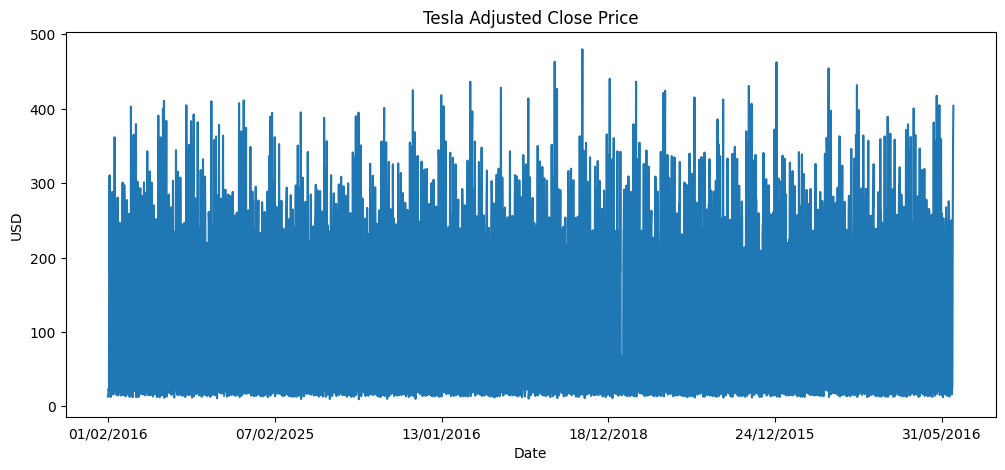

In [2]:
# Load processed prices
prices_df = pd.read_csv("../data/processed/prices_adj.csv", parse_dates=["Date"], index_col="Date")

# Focus on Tesla
tsla = prices_df["TSLA"].dropna()

# Quick plot
tsla.plot(figsize=(12,5), title="Tesla Adjusted Close Price", ylabel="USD")
plt.show()

## Train-Test Split (Chronological)

In [3]:
# Ensure index is datetime with dayfirst=True
tsla.index = pd.to_datetime(tsla.index, dayfirst=True)

# Define split date
split_date = "2024-01-01"

train = tsla.loc[tsla.index < split_date]
test = tsla.loc[tsla.index >= split_date]

print(f"Train period: {train.index.min().date()} → {train.index.max().date()} ({len(train)} points)")
print(f"Test period: {test.index.min().date()} → {test.index.max().date()} ({len(test)} points)")



Train period: 2015-07-01 → 2023-12-29 (2140 points)
Test period: 2024-01-02 → 2025-07-30 (395 points)


## ARIMA Model (auto_arima)

c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=26427.274, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=27676.498, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=26517.705, Time=0.07 sec


c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10

 ARIMA(0,0,1)(0,0,0)[0]             : AIC=26708.532, Time=0.21 sec


c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10

 ARIMA(1,0,2)(0,0,0)[0]             : AIC=26470.879, Time=0.54 sec


c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=26475.796, Time=0.44 sec


c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10

 ARIMA(3,0,2)(0,0,0)[0]             : AIC=25728.383, Time=1.88 sec


c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Acad

 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=2.00 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=3.15 sec


c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10

 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=1.60 sec


c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10

 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.83 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=1.84 sec


c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10

 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=3.05 sec


c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10

 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=25112.750, Time=1.79 sec


c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=25119.554, Time=2.61 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=25223.523, Time=2.31 sec


c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10

 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=25524.308, Time=3.94 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=25108.520, Time=2.78 sec


c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10

 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=25103.950, Time=3.02 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=25478.647, Time=1.57 sec


c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10

 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=25045.679, Time=3.62 sec


c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Acad

 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=25319.590, Time=3.24 sec


c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Acad

 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=25042.402, Time=4.13 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=25043.526, Time=4.30 sec


c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10

 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=25040.585, Time=4.36 sec


c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10

 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=25044.499, Time=4.37 sec


c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Acad

 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=25039.654, Time=5.23 sec


c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Acad

 ARIMA(5,0,5)(0,0,0)[0] intercept   : AIC=25041.617, Time=6.41 sec


c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Acad

 ARIMA(5,0,4)(0,0,0)[0] intercept   : AIC=25044.177, Time=5.18 sec


c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\Week 11\Financial Forecasting & Portfolio Optimization\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_inde

 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=3.98 sec

Best model:  ARIMA(4,0,5)(0,0,0)[0] intercept
Total fit time: 80.624 seconds
Best ARIMA order: (4, 0, 5)


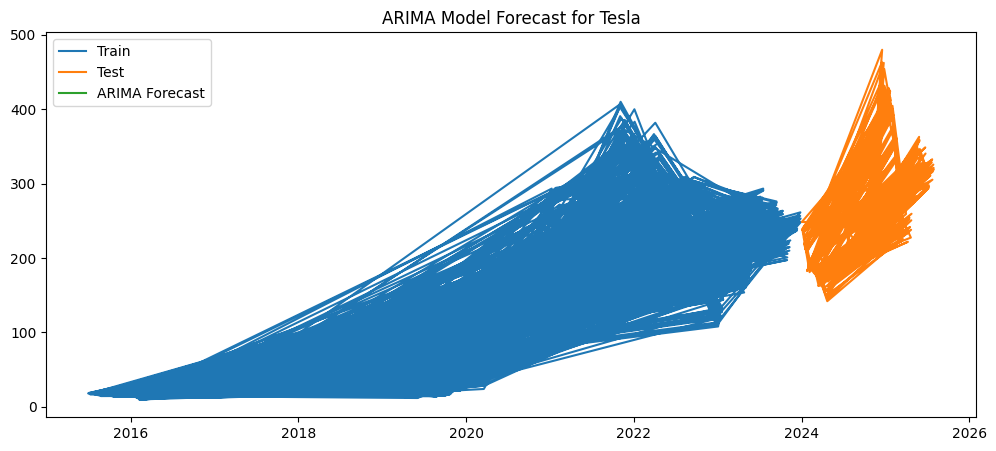

In [6]:
import pmdarima as pm

# Fit ARIMA with auto parameter selection
arima_model = pm.auto_arima(train, 
                            seasonal=False, 
                            stepwise=True,
                            suppress_warnings=True,
                            trace=True)

print("Best ARIMA order:", arima_model.order)

# Forecast on test period
arima_forecast = arima_model.predict(n_periods=len(test))
arima_forecast = pd.Series(arima_forecast, index=test.index)

# Plot
plt.figure(figsize=(12,5))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(arima_forecast, label="ARIMA Forecast")
plt.title("ARIMA Model Forecast for Tesla")
plt.legend()
plt.show()


## ARIMA Model Evaluation

In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

arima_mae = mean_absolute_error(test, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
arima_mape = mape(test, arima_forecast)

print(f"ARIMA MAE:  {arima_mae:.4f}")
print(f"ARIMA RMSE: {arima_rmse:.4f}")
print(f"ARIMA MAPE: {arima_mape:.2f}%")


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

## LSTM Model: Data Preparation

In [9]:
# !pip install tensorflow
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train.values.reshape(-1, 1))
scaled_test = scaler.transform(test.values.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 60  # 60 days
X_train, y_train = create_sequences(scaled_train, SEQ_LENGTH)
X_test, y_test = create_sequences(scaled_test, SEQ_LENGTH)

# Reshape for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")


X_train shape: (2080, 60, 1), y_train shape: (2080, 1)


##  Build & Train LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


##  LSTM Forecast & Evaluation

In [ ]:
# Predict
lstm_preds_scaled = model.predict(X_test)
lstm_preds = scaler.inverse_transform(lstm_preds_scaled)

# Align predictions with test index
lstm_index = test.index[SEQ_LENGTH:]  # skip initial seq_length days
lstm_forecast = pd.Series(lstm_preds.flatten(), index=lstm_index)

# Metrics
lstm_mae = mean_absolute_error(test.iloc[SEQ_LENGTH:], lstm_forecast)
lstm_rmse = np.sqrt(mean_squared_error(test.iloc[SEQ_LENGTH:], lstm_forecast))
lstm_mape = mape(test.iloc[SEQ_LENGTH:], lstm_forecast)

print(f"LSTM MAE:  {lstm_mae:.4f}")
print(f"LSTM RMSE: {lstm_rmse:.4f}")
print(f"LSTM MAPE: {lstm_mape:.2f}%")



## Compare ARIMA vs LSTM

In [ ]:
# Comparison table
results_df = pd.DataFrame({
    "Model": ["ARIMA", "LSTM"],
    "MAE": [arima_mae, lstm_mae],
    "RMSE": [arima_rmse, lstm_rmse],
    "MAPE (%)": [arima_mape, lstm_mape]
})
print(results_df)

# Plot comparison
plt.figure(figsize=(12,5))
plt.plot(test, label="Actual", color="black")
plt.plot(arima_forecast, label="ARIMA", linestyle="--")
plt.plot(lstm_forecast, label="LSTM", linestyle=":")
plt.title("ARIMA vs LSTM Forecast for Tesla")
plt.legend()
plt.show()
